In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first 5 rows
print("Preview of dataset:")
display(df.head())

# Shape of the dataset
print(f"\nDataset shape: {df.shape}")

# Column types and null count
print("\nData types and nulls:")
print(df.info())

# Summary stats for numerical features
print("\nSummary statistics:")
display(df.describe())


Preview of dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Dataset shape: (7043, 21)

Data types and nulls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   objec

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# 📊 Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) helps us understand the underlying structure, trends, and potential issues in the Telco Customer Churn dataset. It guides preprocessing, feature selection, and modeling decisions.

---

## 🧾 Dataset Overview

- The dataset contains **7,043 customer records** and **21 features**.
- Features include demographics, account information, services, and billing.
- The target variable is **`Churn`** (Yes = churned, No = retained).


In [ ]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check for spaces or invalid entries in TotalCharges
print("Unique entries in 'TotalCharges' that might cause issues:")
print(df[~df['TotalCharges'].str.replace('.', '', 1).str.isnumeric()]['TotalCharges'].value_counts())

# Convert 'TotalCharges' to numeric (force errors to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Re-check for missing values now
print("Missing values after conversion:")
print(df.isnull().sum())


Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Unique entries in 'TotalCharges' that might cause issues:
TotalCharges
    11
Name: count, dtype: int64
Missing values after conversion:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract        

In [ ]:
# Drop rows with missing TotalCharges
df.dropna(subset=['TotalCharges'], inplace=True)

# Reset index after drop
df.reset_index(drop=True, inplace=True)

# Drop irrelevant columns
df.drop(['customerID'], axis=1, inplace=True)

print("Data cleaned and ready for analysis.")

Data cleaned and ready for analysis.


Churn class distribution:
Churn
No     5163
Yes    1869
Name: count, dtype: int64

Churn percentage:
Churn
No     73.42
Yes    26.58
Name: proportion, dtype: float64


/tmp/ipython-input-5-970858379.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


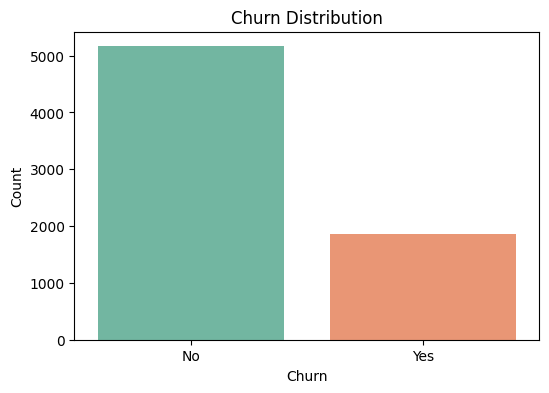

In [ ]:
# Value counts of target variable
churn_counts = df['Churn'].value_counts()
churn_percent = df['Churn'].value_counts(normalize=True) * 100

print("Churn class distribution:")
print(churn_counts)
print("\nChurn percentage:")
print(churn_percent.round(2))

# Plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


---

## 🔍 Class Distribution

- **No (not churned)**: ~73.4%
- **Yes (churned)**: ~26.6%

This reveals **moderate class imbalance**, which can lead to biased predictions if not handled. We’ll consider:
- Stratified sampling for train/test split
- Evaluation metrics like F1-score and AUC
- Class weighting or SMOTE if necessary

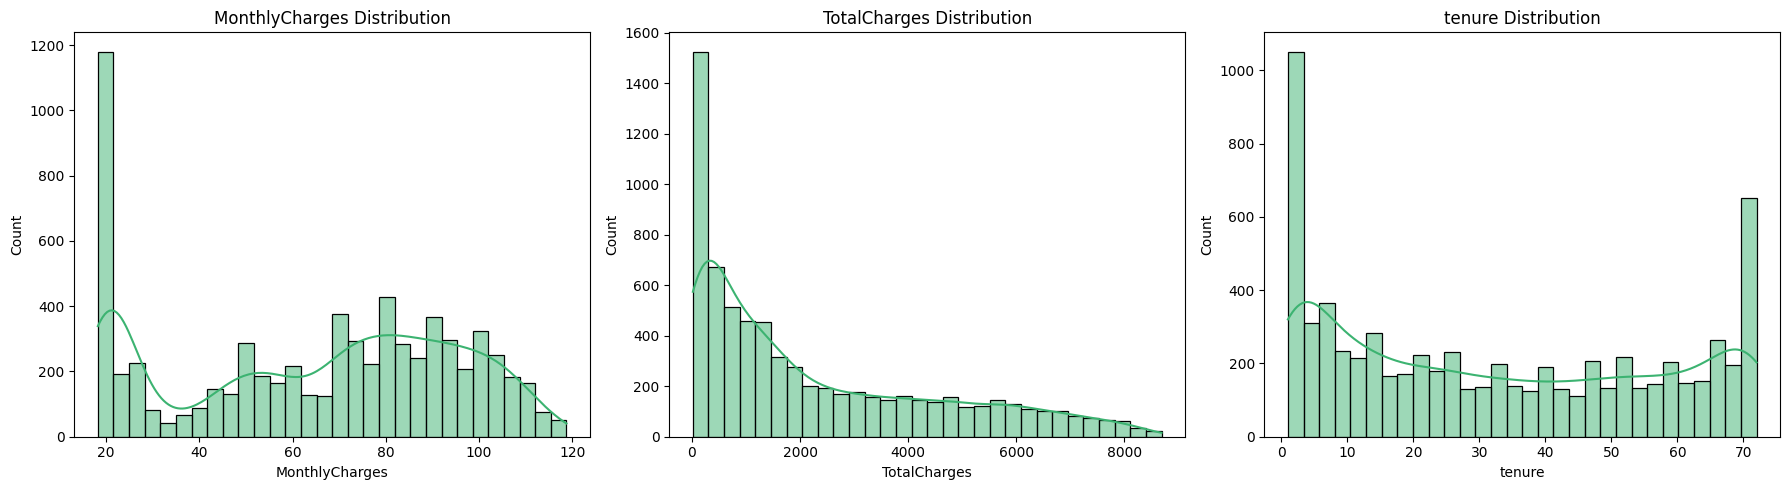

In [ ]:
# Set up the figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Features to plot
num_cols = ['MonthlyCharges', 'TotalCharges', 'tenure']

# Create histograms with KDE
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='mediumseagreen', bins=30)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()



---
## 📈 Numerical Feature Distributions

We explored three key numerical features:

- **`tenure`**: U-shaped distribution. Many customers either churn early or stay long-term.
- **`MonthlyCharges`**: Multi-modal — suggests tiered pricing models.
- **`TotalCharges`**: Right-skewed. Strongly influenced by tenure and monthly charges.

These insights guide us in choosing scaling strategies and potential transformations for models that require normalized input.



/tmp/ipython-input-7-2719443418.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='pastel', order=df[col].value_counts().index)
/tmp/ipython-input-7-2719443418.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='pastel', order=df[col].value_counts().index)
/tmp/ipython-input-7-2719443418.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='pastel', order=df[col].value_counts().index)
/tmp/ipython-input-7-2719443418.py:13: F

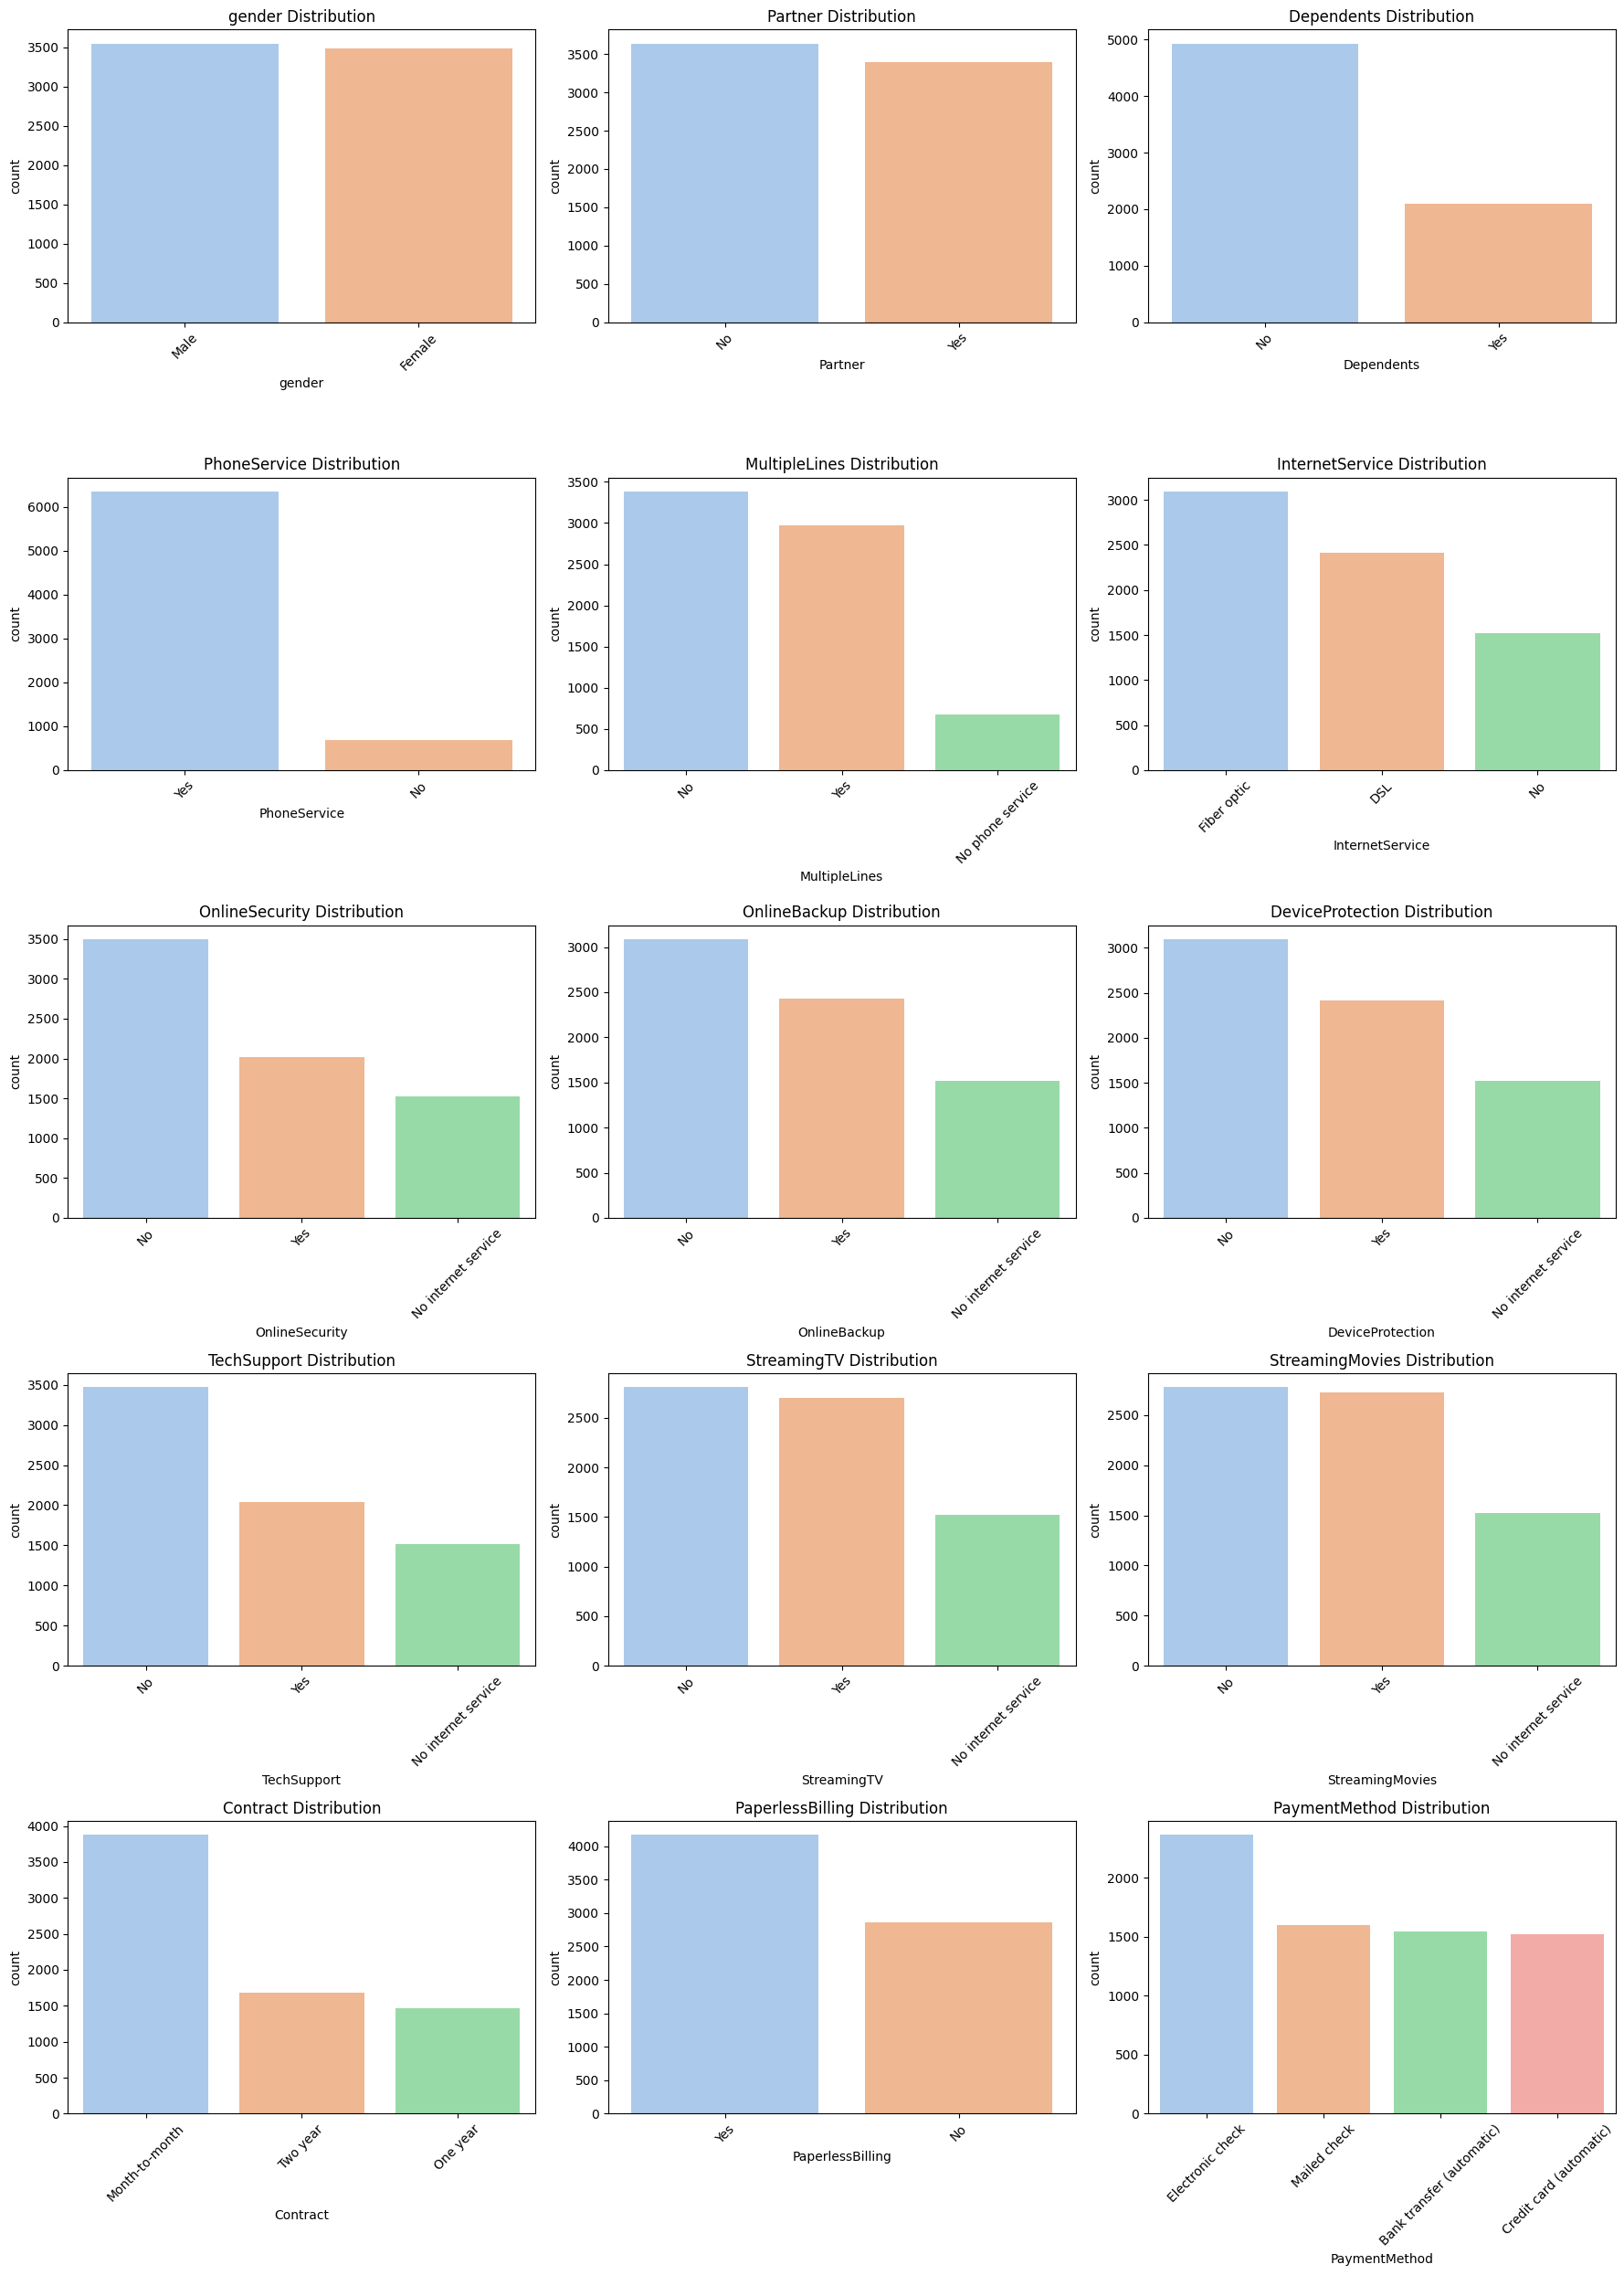

In [ ]:
# Select all object-type columns (categorical)
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols.remove('Churn')  # Exclude target for now

n = len(cat_cols)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette='pastel', order=df[col].value_counts().index)
    axes[i].set_title(f'{col} Distribution')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


---

## 📊 Categorical Feature Distributions

We examined all categorical (object-type) features. Observations include:

- Most customers are on **month-to-month contracts**.
- Common billing: **paperless billing** and **electronic check**.
- Services like **OnlineSecurity**, **TechSupport**, and **DeviceProtection** are not widely subscribed to.

These distributions offer an early view of customer behavior and potential churn factors.


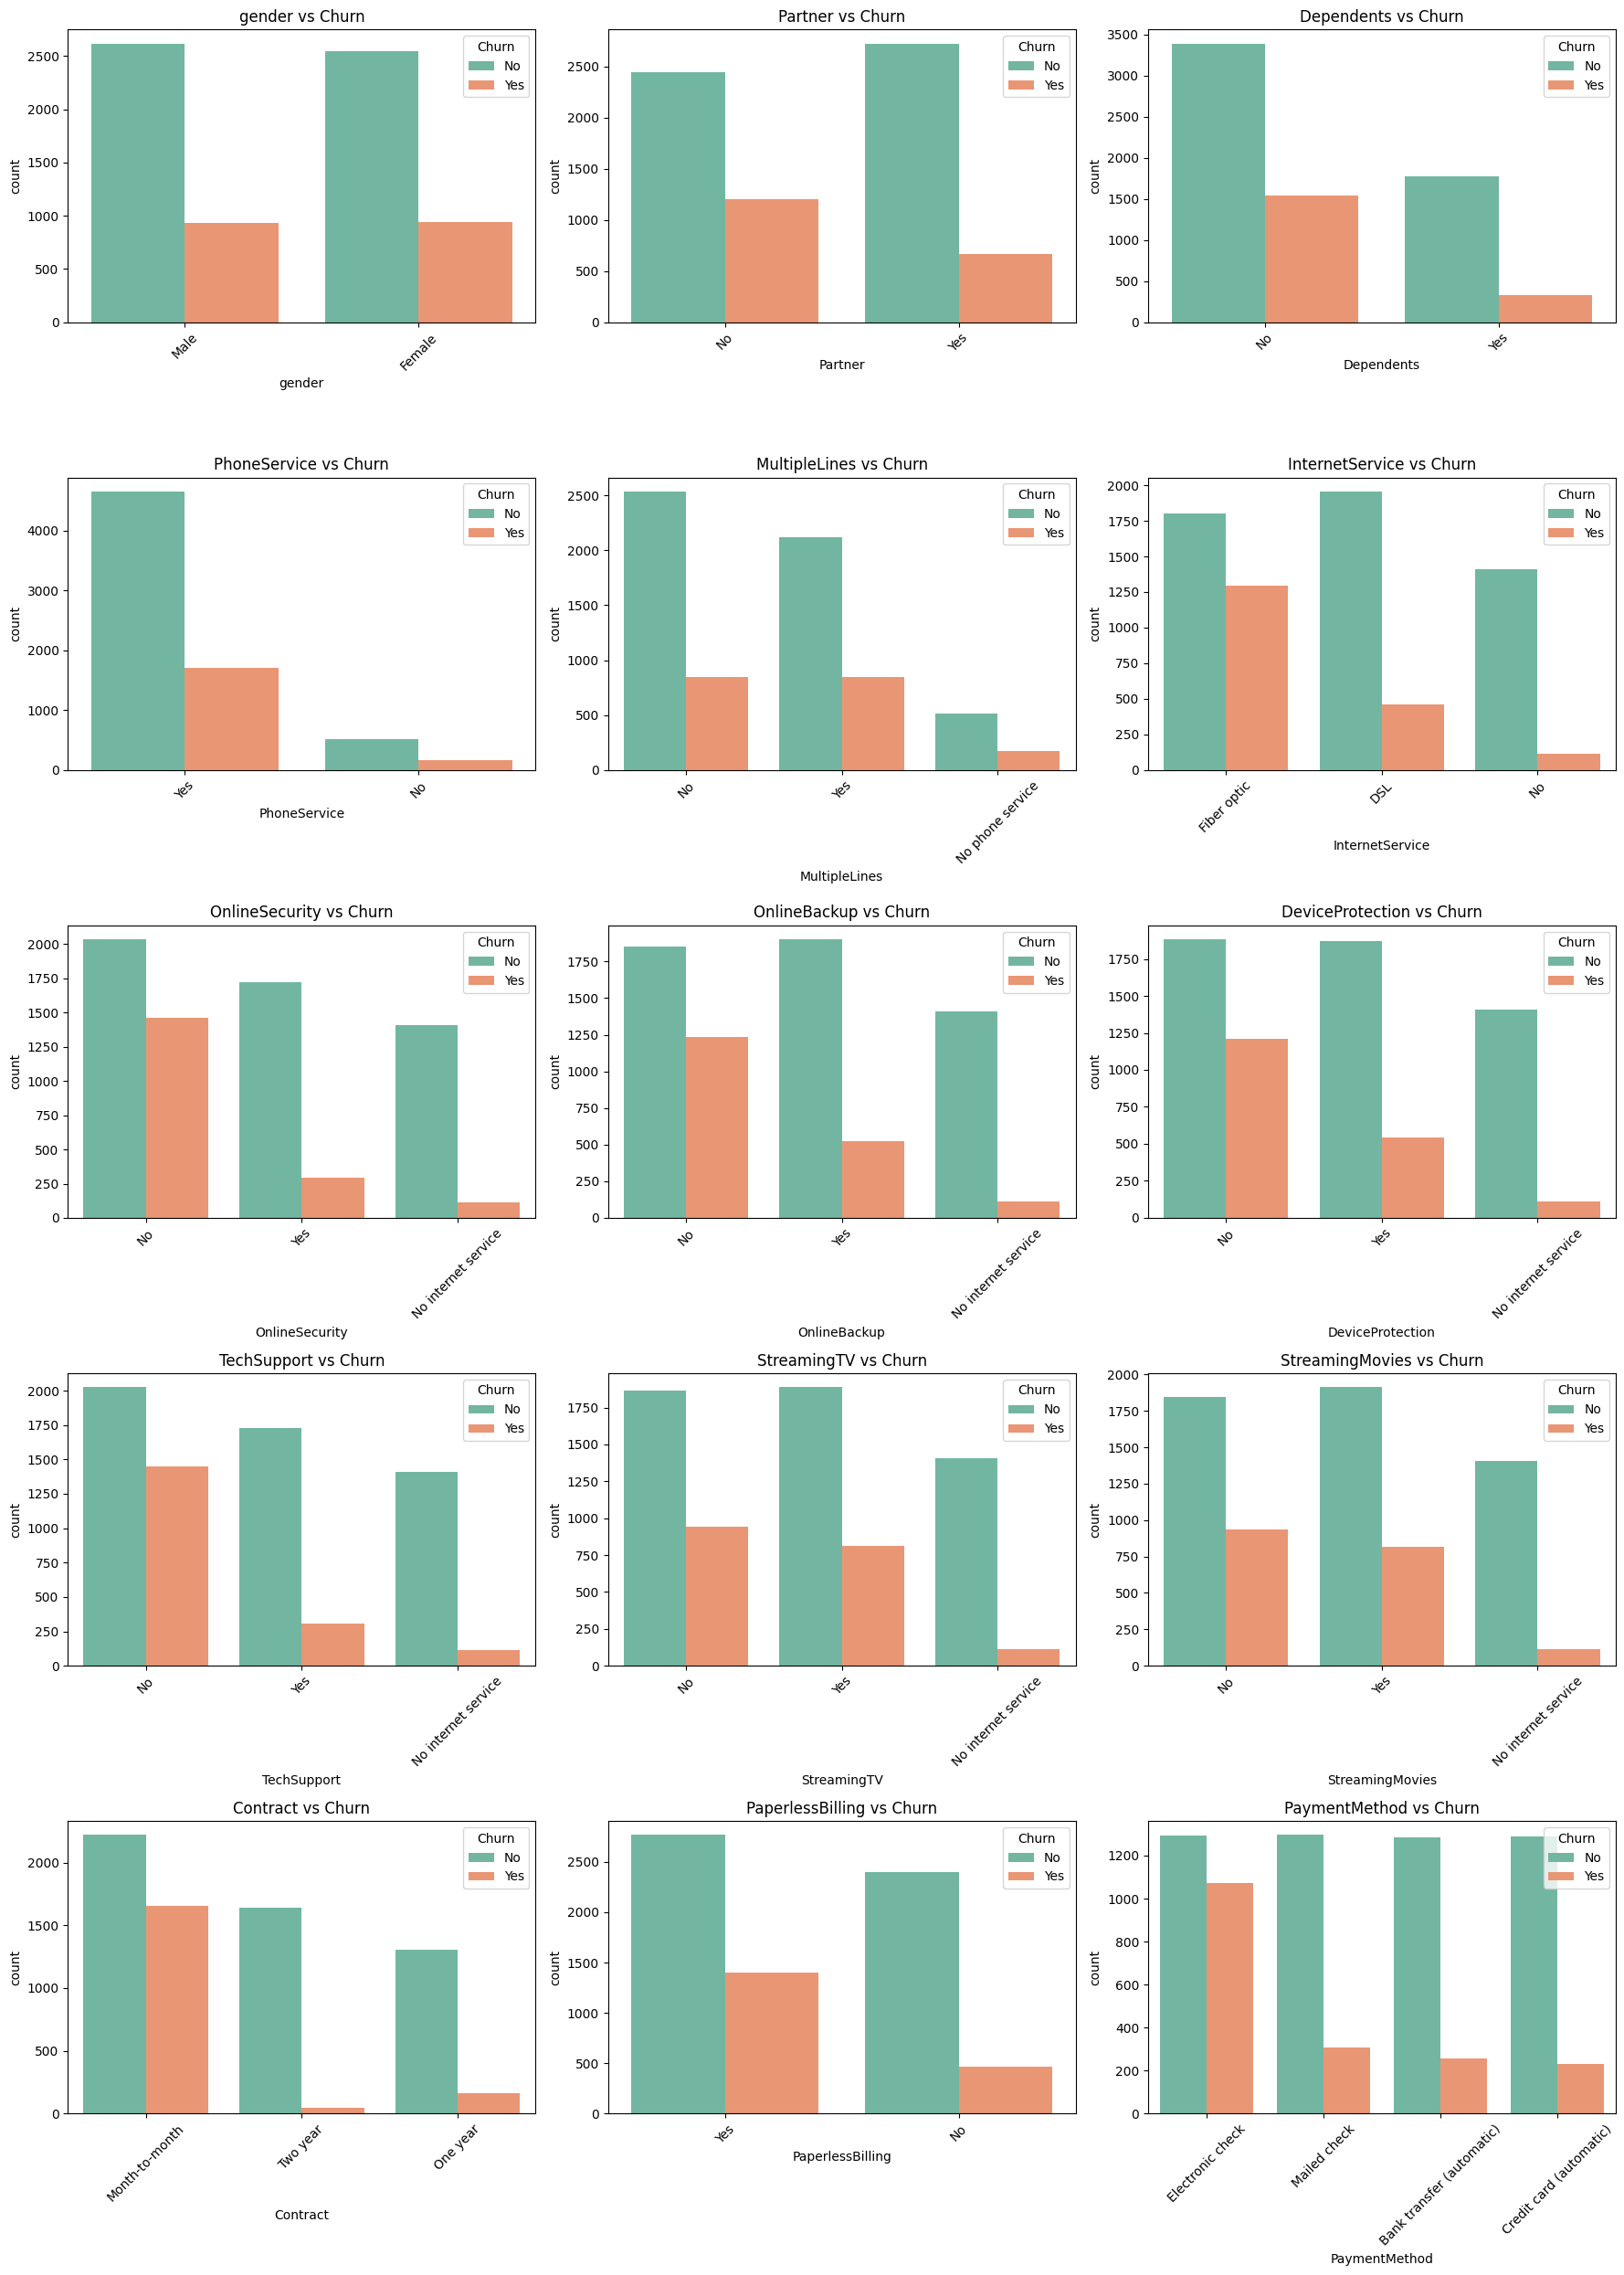

In [ ]:
# Set up subplots
n = len(cat_cols)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i],
                  palette='Set2', order=df[col].value_counts().index)
    axes[i].set_title(f'{col} vs Churn')
    axes[i].tick_params(axis='x', rotation=45)

# Clean up empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



---

## 🔄 Categorical Features vs. Churn

We analyzed churn proportions across categorical variables:

- Customers on **month-to-month contracts** churn the most.
- **Electronic check** users show higher churn compared to other payment methods.
- Lack of **OnlineSecurity**, **TechSupport**, or **OnlineBackup** correlates with higher churn.

These features will likely play a key role in our predictive model and should be retained during feature selection.

/tmp/ipython-input-9-2100613308.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
/tmp/ipython-input-9-2100613308.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
/tmp/ipython-input-9-2100613308.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')


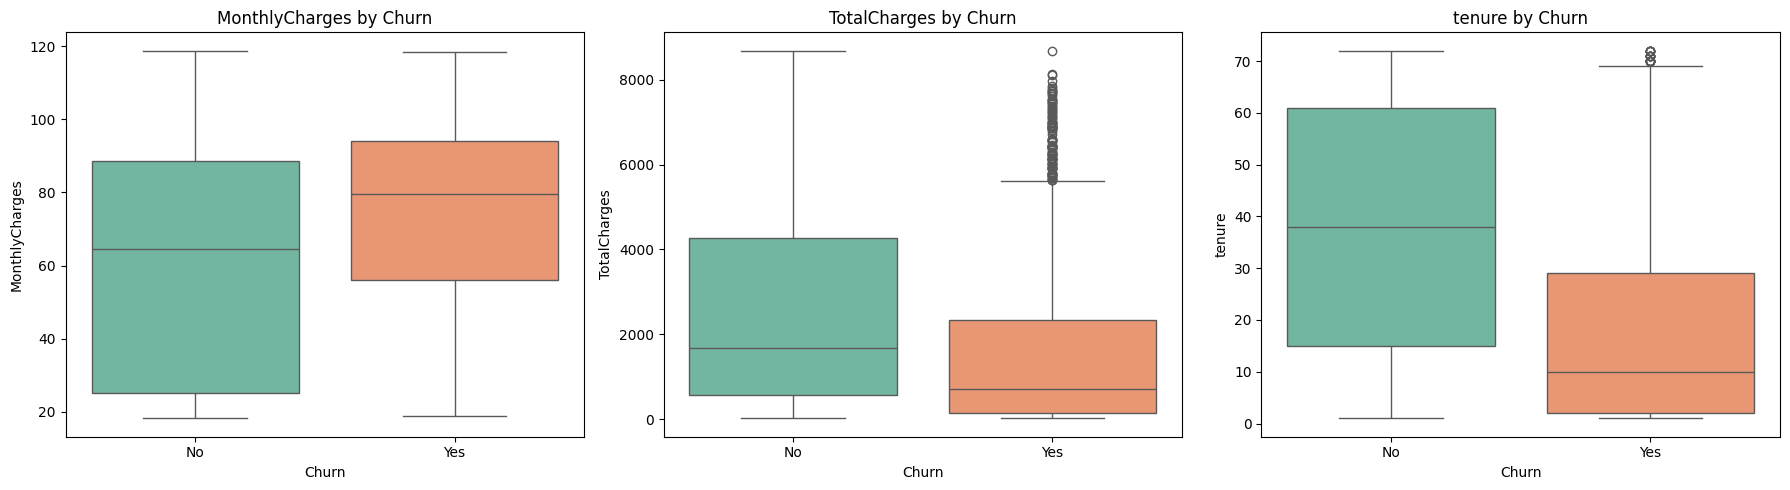

In [ ]:
num_cols = ['MonthlyCharges', 'TotalCharges', 'tenure']

plt.figure(figsize=(18, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
    plt.title(f'{col} by Churn')
plt.tight_layout()
plt.show()




---

## 📦 Numerical Features vs. Churn (Boxplots)

Boxplots reveal:

- Churned users typically have **lower `tenure`** and **lower `TotalCharges`**.
- Their **`MonthlyCharges`** are slightly higher on average.

These patterns reinforce the significance of these features in churn prediction.



In [ ]:
# import numpy as np
# df['LogTotalCharges'] = np.log1p(df['TotalCharges'])


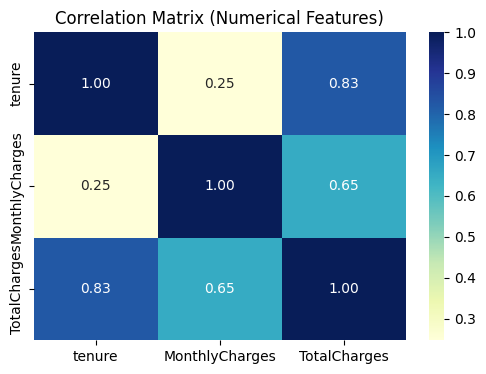

In [ ]:
# Select only numerical features
num_df = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

# Compute correlation matrix
corr_matrix = num_df.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Matrix (Numerical Features)')
plt.show()


---

## 🔗 Correlation Matrix

We examined pairwise correlations between numerical features:

- `TotalCharges` is **strongly correlated** with `tenure` (r ≈ 0.83).
- `MonthlyCharges` and `TotalCharges` also show moderate correlation (r ≈ 0.65).

This suggests potential multicollinearity — important for linear models, but tree-based methods handle this well.

---

## ✅ EDA Summary & Key Takeaways

- The dataset has **moderate churn imbalance** (~26.6% churn).
- Categorical features like **Contract**, **OnlineSecurity**, and **PaymentMethod** are **strong churn indicators**.
- Churned customers have **lower tenure**, **lower total spend**, and **slightly higher monthly bills**.
- No major data quality issues remain after cleaning.
- Correlated features (e.g., `TotalCharges`, `tenure`) will be handled based on model type.

EDA gives us both **actionable insights** and **preprocessing guidance**, setting a solid foundation for machine learning modeling.


In [ ]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [ ]:
# Copy dataframe to preserve original
df_model = df.copy()

# Encode target variable
df_model['Churn'] = df_model['Churn'].map({'No': 0, 'Yes': 1})

# One-hot encode categorical features (drop first to avoid multicollinearity)
df_model = pd.get_dummies(df_model, drop_first=True)

# Verify encoding
print(f"Shape after encoding: {df_model.shape}")
df_model.head()


Shape after encoding: (7032, 31)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# Stratified split to preserve churn ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Train size: {X_train.shape[0]}")
print(f"Test size: {X_test.shape[0]}")


Train size: 5625
Test size: 1407


In [ ]:
# Initialize with optional constraints
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train, y_train)

print("Decision Tree trained.")


Decision Tree trained.


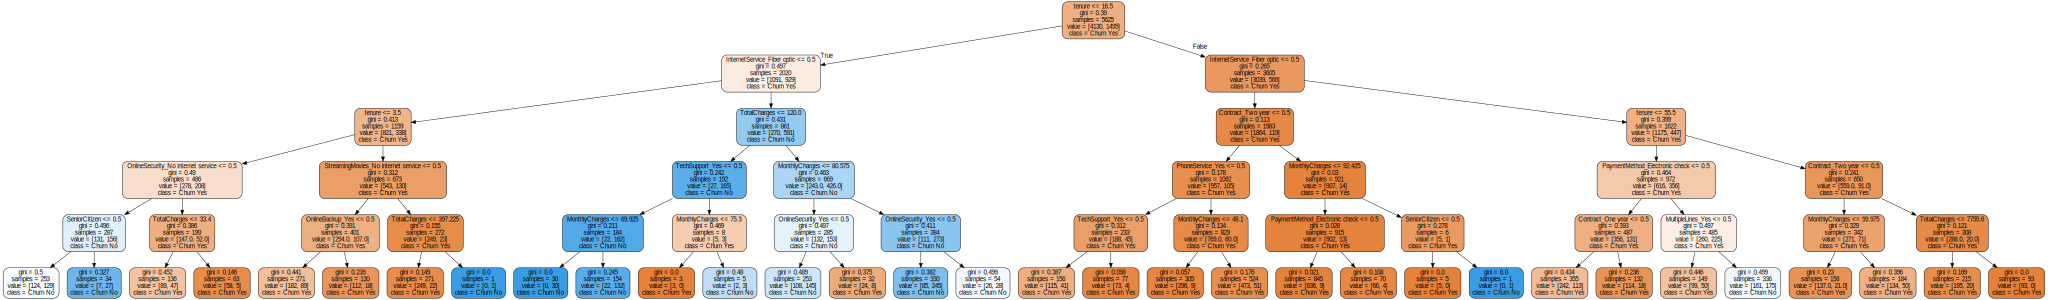

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
        dtree,
        out_file="iris_tree.dot",
        feature_names=list(X.columns),
        class_names=["Churn Yes", "Churn No"],
        rounded=True,
        filled=True
    )

from graphviz import Source

tree_graph = Source.from_file("iris_tree.dot")
tree_graph.render("iris_tree", format="png", cleanup=True)  # This will create iris_tree.png

# If you are in Jupyter Notebook:
tree_graph

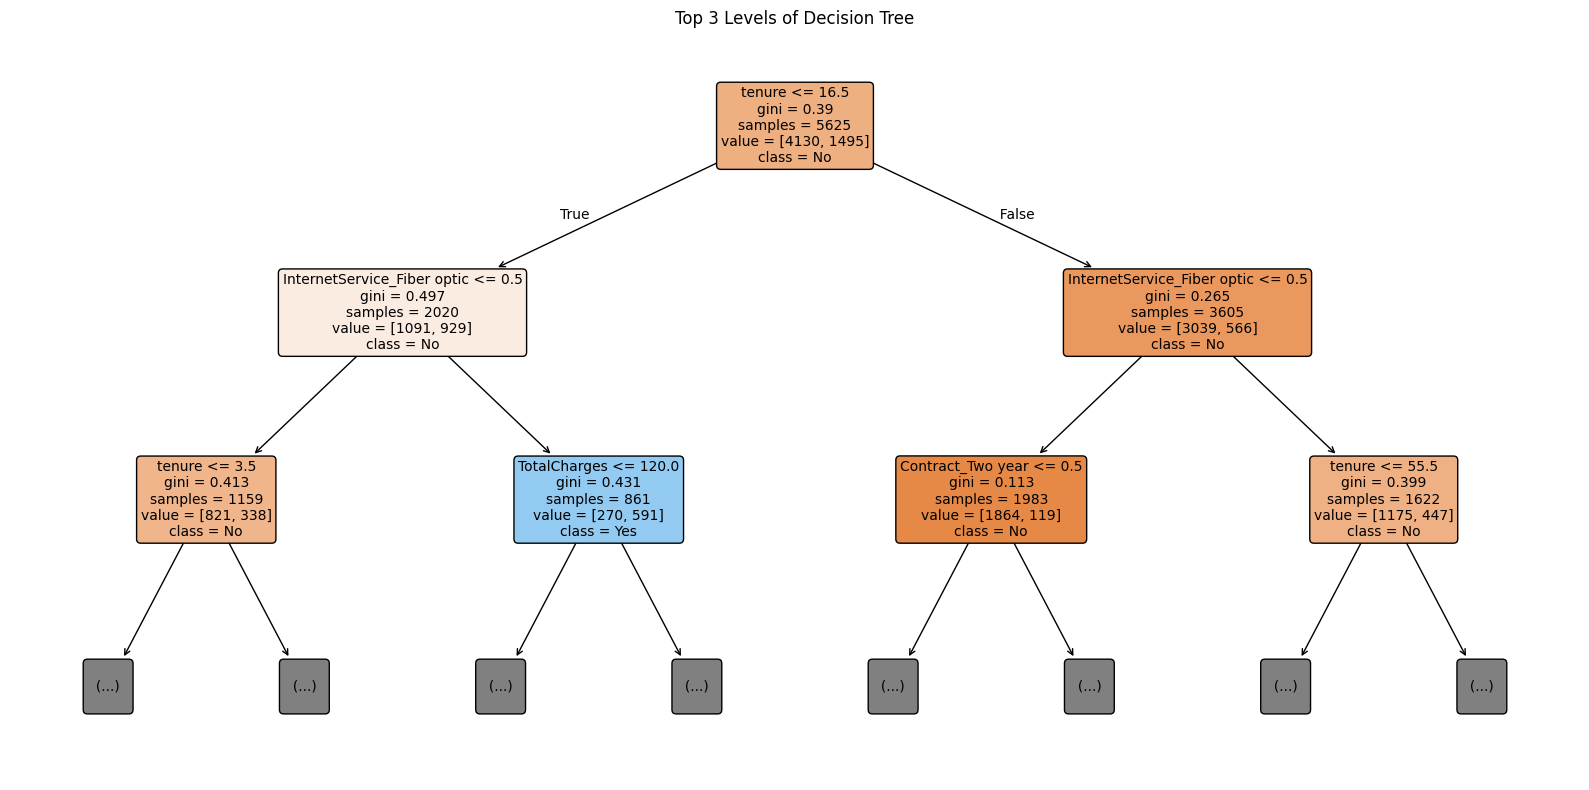

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Limit depth in visualization only — tree was trained with max_depth=5
plt.figure(figsize=(16, 8))
plot_tree(
    dtree,                           # your DecisionTreeClassifier object
    feature_names=X.columns,        # column names from your preprocessed X
    class_names=['No', 'Yes'],      # 0 = No churn, 1 = Yes churn
    filled=True,
    rounded=True,
    max_depth=2,                    # Visualize only top 3 levels (0, 1, 2)
    fontsize=10
)
plt.title("Top 3 Levels of Decision Tree")
plt.tight_layout()
plt.show()

In [ ]:
y_pred = dtree.predict(X_test)
y_proba = dtree.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
print(f"ROC AUC:  {roc_auc_score(y_test, y_proba):.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1033
           1       0.58      0.60      0.59       374

    accuracy                           0.78      1407
   macro avg       0.72      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407

Accuracy: 0.78
F1 Score: 0.59
ROC AUC:  0.82


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'class_weight': [None, 'balanced']
}

grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',  # Optimizing directly for F1
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)
print("✅ Best params:", grid.best_params_)


✅ Best params: {'class_weight': 'balanced', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

best_tree = grid.best_estimator_
y_pred = best_tree.predict(X_test)
y_proba = best_tree.predict_proba(X_test)[:, 1]

print("🔍 Classification Report (Optimized Tree):")
print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.2f}")

🔍 Classification Report (Optimized Tree):
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1035
           1       0.50      0.81      0.62       374

    accuracy                           0.73      1409
   macro avg       0.70      0.76      0.70      1409
weighted avg       0.80      0.73      0.75      1409

ROC AUC: 0.76


In [ ]:
dtree_thres = DecisionTreeClassifier(criterion='gini', class_weight='balanced', max_depth=7, min_samples_split=2, min_samples_leaf=1)
dtree_thres.fit(X_train, y_train)
y_prob = dtree_thres.predict_proba(X_test)[:, 1]  # Probability of class = 1 (churn)
threshold = 0.6  # try 0.4, 0.35, etc.
y_pred_thresh = (y_prob >= threshold).astype(int)
print("🔍 Classification Report (Threshold = {:.2f})".format(threshold))
print(classification_report(y_test, y_pred_thresh))


🔍 Classification Report (Threshold = 0.60)
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1033
           1       0.53      0.75      0.62       374

    accuracy                           0.76      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.76      0.77      1407



In [ ]:
import pickle
model_pkl_file = 'decision_tree_model.pkl'
# Save the model
with open(model_pkl_file, 'wb') as file:
  pickle.dump(dtree_thres, file)


In [ ]:
# Initialize with optional constraints
dtree_penalty = DecisionTreeClassifier(class_weight={0: 1, 1: 10})
dtree_penalty.fit(X_train, y_train)

print("Decision Tree trained.")
y_pred = dtree_penalty.predict(X_test)
y_proba = dtree_penalty.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

Decision Tree trained.
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1035
           1       0.50      0.78      0.60       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.79      0.73      0.75      1409



Text(0.5, 0, 'Threshold')

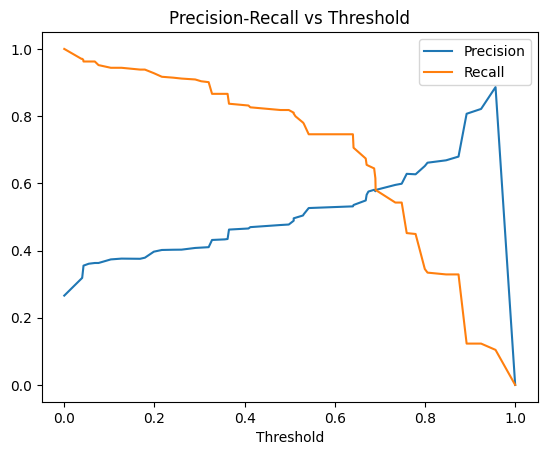

In [ ]:
from sklearn.metrics import precision_recall_curve

y_scores = dtree_thres.predict_proba(X_test)[:, 1]
prec, rec, thresholds = precision_recall_curve(y_test, y_scores)


plt.plot(thresholds, prec[:-1], label='Precision')
plt.plot(thresholds, rec[:-1], label='Recall')
plt.legend(); plt.title("Precision-Recall vs Threshold"); plt.xlabel("Threshold")

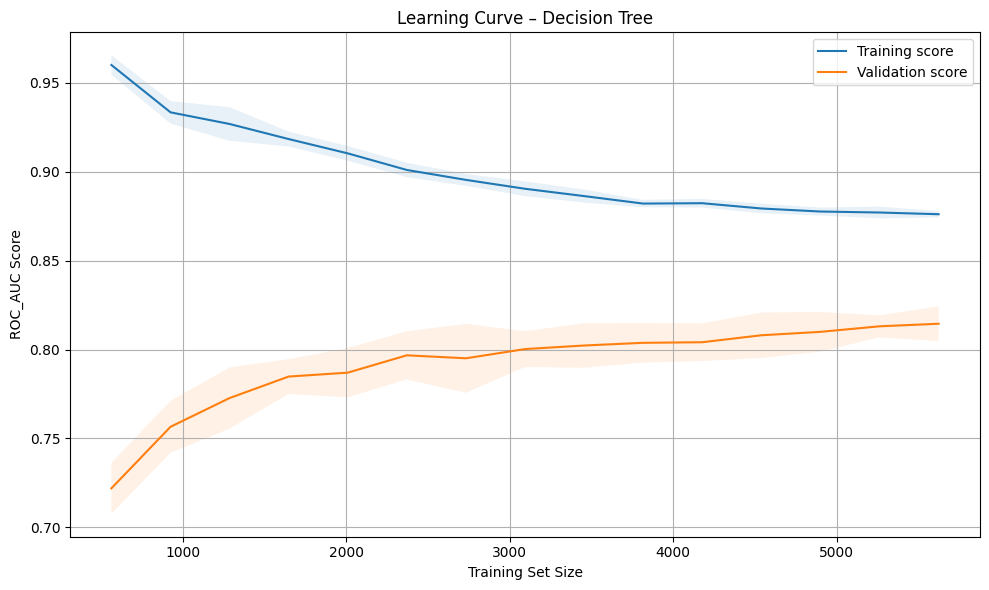

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

# Use your best-found hyperparameters if available
dtree_ver = DecisionTreeClassifier(criterion='gini', class_weight='balanced', max_depth=7, min_samples_split=2, min_samples_leaf=1)

# Compute learning curve
scoring = "roc_auc"
train_sizes, train_scores, val_scores = learning_curve(
    dtree_ver, X, y,
    train_sizes=np.linspace(0.1, 1.0, 15),
    cv=5,
    scoring=scoring,  # or 'f1_macro', 'recall', etc.
    n_jobs=-1
)

# Mean and std
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_std = val_scores.std(axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, label='Validation score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel(scoring.upper()+" Score")
plt.title('Learning Curve – Decision Tree')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# F1-score on class 1 (churn)
f1_scores = cross_val_score(dtree_ver, X, y, cv=5, scoring='f1')
recall_scores = cross_val_score(dtree_ver, X, y, cv=5, scoring='recall')
precision_scores = cross_val_score(dtree_ver, X, y, cv=5, scoring='precision')

print("F1 Scores:", np.round(f1_scores, 3))
print("Recall Scores:", np.round(recall_scores, 3))
print("Precision Scores:", np.round(precision_scores, 3))
print("→ Mean F1: {0}, STD F1: {1}".format(round(f1_scores.mean(), 3), round(f1_scores.std(), 3)))
print("→ Mean Recall: {0}, STD F1: {1}".format(round(recall_scores.mean(), 3), round(recall_scores.std(), 3)))
print("→ Mean Precision: {0}, STD F1: {1}".format(round(precision_scores.mean(), 3), round(precision_scores.std(), 3)))


F1 Scores: [0.607 0.62  0.606 0.575 0.598]
Recall Scores: [0.832 0.853 0.783 0.783 0.775]
Precision Scores: [0.478 0.488 0.493 0.454 0.486]
→ Mean F1: 0.601, STD F1: 0.015
→ Mean Recall: 0.805, STD F1: 0.031
→ Mean Precision: 0.48, STD F1: 0.014


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 1. Identify categorical and numeric columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove 'customerID' if it's present
categorical_cols = [col for col in categorical_cols if col not in ['customerID']]

# 2. Create preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
])


from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', MLPClassifier(
        hidden_layer_sizes=(128, 256, 64),
        activation='tanh',
        max_iter=300,
        random_state=42
    ))
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409



/tmp/ipython-input-11-1585239528.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


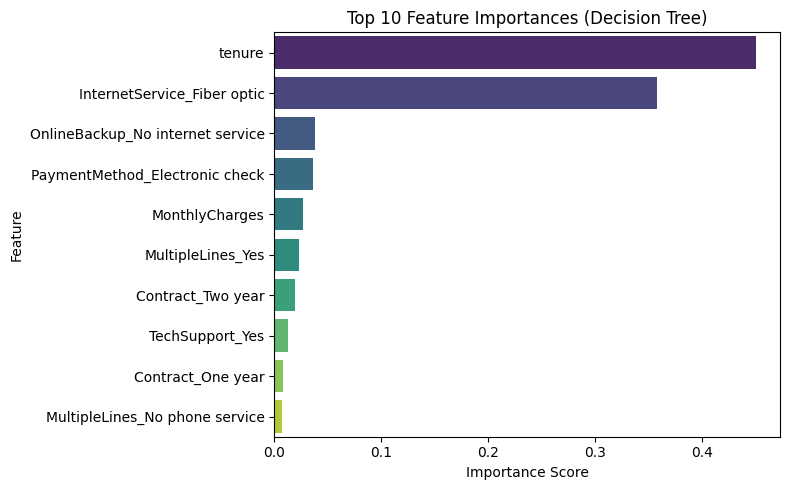

In [ ]:
# Plot feature importances
feat_importances = pd.Series(dtree.feature_importances_, index=X.columns)
top_features = feat_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title('Top 10 Feature Importances (Decision Tree)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


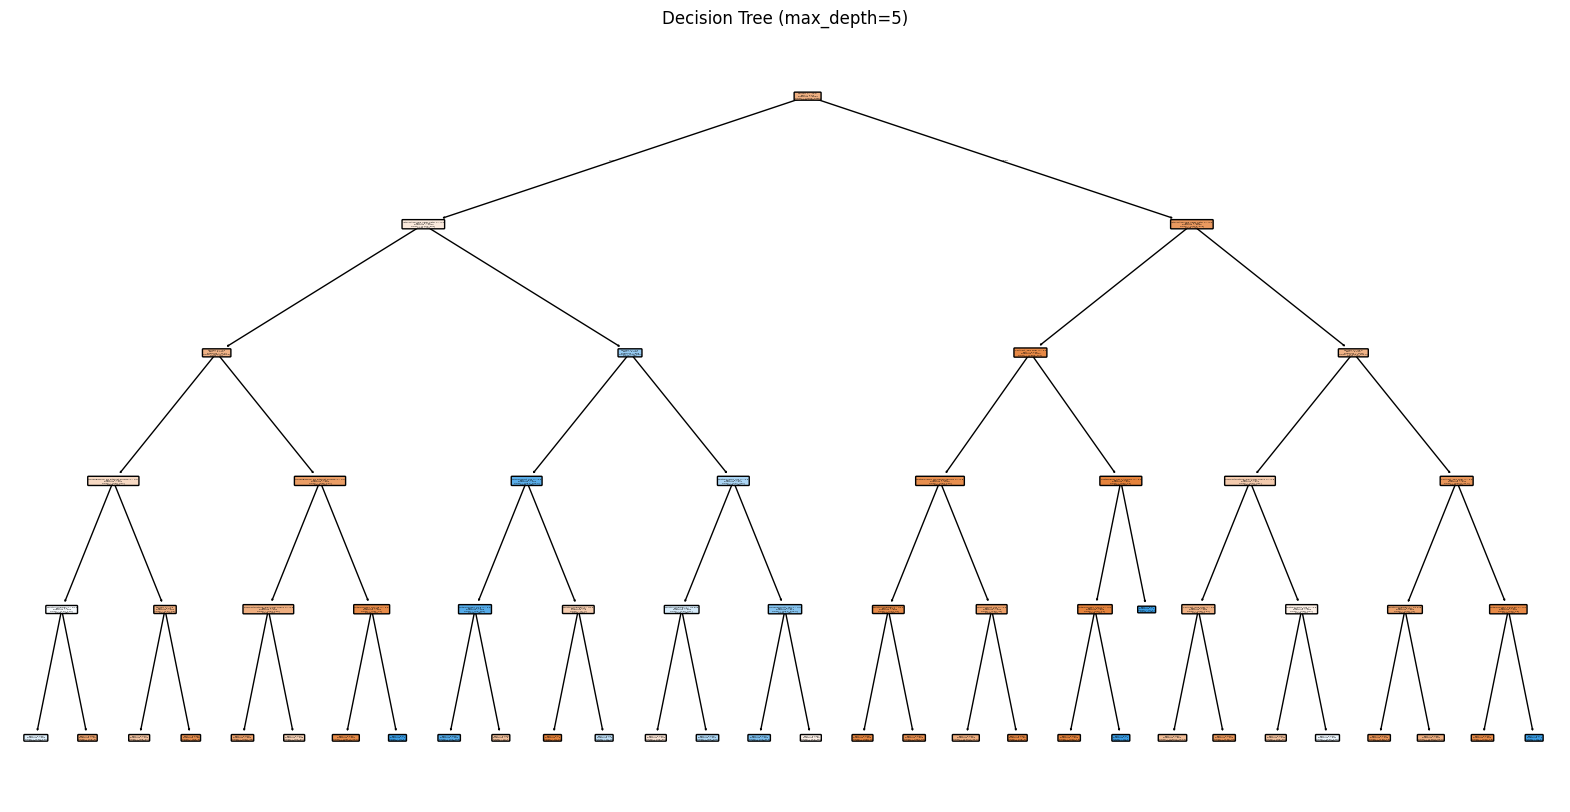

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.title("Decision Tree (max_depth=5)")
plt.show()


# 🌳 Decision Tree Modeling

We begin our modeling process with a Decision Tree classifier, focusing on interpretability and identifying key features that influence customer churn.

---

## 🔧 Data Preparation

- **Target variable (`Churn`)** was label-encoded: `Yes → 1`, `No → 0`
- All **categorical variables** were converted using **one-hot encoding**
- Dataset was split into train/test sets using **stratified sampling** to preserve churn ratio

---

## 📈 Model: Decision Tree Classifier

- Model: `DecisionTreeClassifier(max_depth=5)`
- Reason for max depth: balance between interpretability and predictive power
- Trained on 80% of data, tested on remaining 20%

---

## 📊 Model Evaluation

| Metric      | Value |
|-------------|--------|
| Accuracy    | 0.78   |
| F1 Score    | 0.59   |
| ROC AUC     | 0.82   |

- The model performs well in overall accuracy.
- Churn prediction (minority class) is moderately accurate with a reasonable F1-score.
- ROC AUC of 0.82 suggests good separation between churners and non-churners.

---

## 🔍 Feature Importance

Top contributing features:

1. `tenure`
2. `InternetService_Fiber optic`
3. `TotalCharges`
4. `PaymentMethod_Electronic check`
5. `OnlineSecurity_No internet service`

These features align with real-world expectations: short-term, high-bill, fiber customers are more likely to churn, especially without security services.

---

## 🧠 Model Interpretability

A visualization of the decision tree confirms that:

- `tenure < X` is often the **first split**
- Features like `OnlineSecurity`, `Contract`, and `InternetService` further guide churn vs. non-churn paths

This supports the interpretability goal of the project while laying the groundwork for comparing with more complex models.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize with same random_state for consistency
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

print("Random Forest trained.")


Random Forest trained.


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Predictions and probabilities
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Metrics
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_rf):.2f}")


🔍 Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

✔️ Accuracy: 0.79
✔️ F1 Score: 0.56
✔️ ROC AUC: 0.83


/tmp/ipython-input-24-2132918786.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rf_features.values, y=top_rf_features.index, palette='mako')


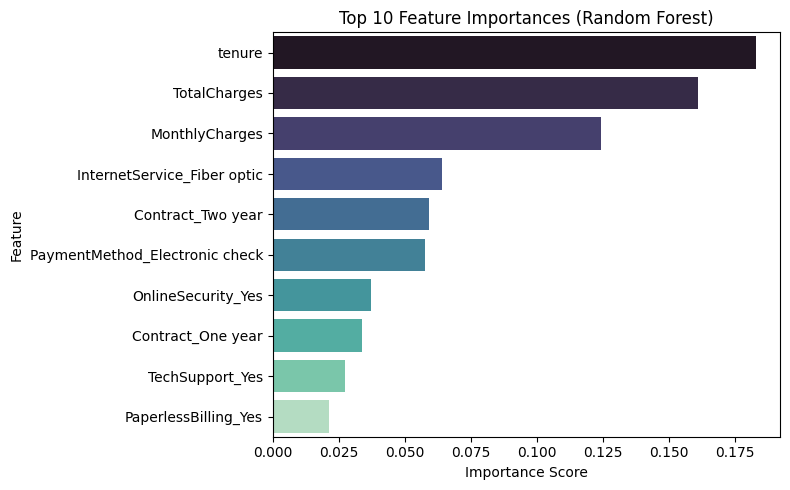

In [ ]:
# Top 10 feature importances
importances_rf = pd.Series(rf.feature_importances_, index=X.columns)
top_rf_features = importances_rf.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=top_rf_features.values, y=top_rf_features.index, palette='mako')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

# Instantiate model
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Fit the model
xgb_model.fit(X_train, y_train)
print("XGBoost model trained.")


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:54:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model trained.


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_xgb):.2f}")


Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Accuracy: 0.80
F1 Score: 0.58
ROC AUC: 0.84


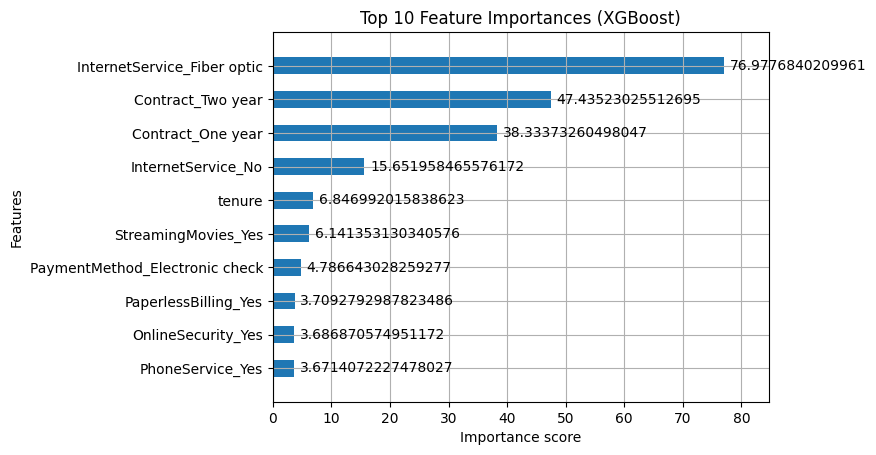

In [ ]:
xgb.plot_importance(xgb_model, importance_type='gain', max_num_features=10, height=0.5)
plt.title('Top 10 Feature Importances (XGBoost)')
plt.show()


In [ ]:
from sklearn.ensemble import VotingClassifier

# Create base models
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
xgbc = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1,
                     use_label_encoder=False, eval_metric='logloss', random_state=42)

# Voting classifier
voting_model = VotingClassifier(
    estimators=[('DT', dt), ('RF', rf), ('XGB', xgbc)],
    voting='soft'  # Use probabilities
)

# Fit ensemble
voting_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:56:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


VotingClassifier(estimators=[('DT',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=42)),
                             ('RF',
                              RandomForestClassifier(max_depth=10,
                                                     random_state=42)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_m...
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

In [ ]:
y_pred_vote = voting_model.predict(X_test)
y_proba_vote = voting_model.predict_proba(X_test)[:, 1]

print("Classification Report (Voting Classifier):")
print(classification_report(y_test, y_pred_vote))

print(f"Accuracy: {accuracy_score(y_test, y_pred_vote):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_vote):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_vote):.2f}")


Classification Report (Voting Classifier):
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1035
           1       0.74      0.37      0.49       374

    accuracy                           0.80      1409
   macro avg       0.77      0.66      0.68      1409
weighted avg       0.79      0.80      0.77      1409

Accuracy: 0.80
F1 Score: 0.49
ROC AUC: 0.84


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Base learners
estimators = [
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1,
                          use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Meta-learner
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    passthrough=False  # Set to True to include original features
)

# Fit the stacking model
stack_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:57:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:58:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:59:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:59:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:00:27] WARNING: /w

StackingClassifier(cv=5,
                   estimators=[('dt',
                                DecisionTreeClassifier(max_depth=5,
                                                       random_state=42)),
                               ('rf',
                                RandomForestClassifier(max_depth=10,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None, ...))],
                   final_estimator=LogisticRegression())

In [ ]:
y_pred_stack = stack_model.predict(X_test)
y_proba_stack = stack_model.predict_proba(X_test)[:, 1]

print("Classification Report (Stacking Classifier):")
print(classification_report(y_test, y_pred_stack))

print(f"Accuracy: {accuracy_score(y_test, y_pred_stack):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_stack):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_stack):.2f}")


Classification Report (Stacking Classifier):
              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1035
           1       0.68      0.50      0.58       374

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

Accuracy: 0.81
F1 Score: 0.58
ROC AUC: 0.84


In [ ]:
# Predict churn probabilities using best model (XGBoost)
df_risk = df.copy()
df_risk['churn_proba'] = dtree_thres.predict_proba(X)[:, 1]

# Flag high-risk customers (threshold can be adjusted)
high_risk = df_risk[df_risk['churn_proba'] > 0.6].copy()
print(f"High-risk customers identified: {len(high_risk)}")


High-risk customers identified: 2597


In [ ]:
import random
def generate_recommendation(row):
    recs = []

    if row['Contract'] == 'Month-to-month':
        recs.append("Offer annual contract discounts")

    if row['PaymentMethod'] == 'Electronic check':
        recs.append("Promote auto-pay or credit card discounts")

    if row['OnlineSecurity'] == 'No':
        recs.append("Bundle Online Security")

    if row['TechSupport'] == 'No':
        recs.append("Add 24/7 Tech Support package")

    if row['tenure'] < 12:
        recs.append("Target with loyalty retention campaign")

    if not recs:
        return "No specific recommendation"
    random.shuffle(recs)
    return "; ".join(recs)

# Apply to high-risk customers
high_risk['Recommendation'] = high_risk.apply(generate_recommendation, axis=1)

# Display sample
high_risk[['churn_proba', 'Recommendation']].head()


,churn_proba,Recommendation
0,0.665930,Promote auto-pay or credit card discounts; Add...
5,0.918216,Bundle Online Security; Target with loyalty re...
8,0.690519,Promote auto-pay or credit card discounts; Off...
20,0.926845,Bundle Online Security; Promote auto-pay or cr...
31,0.760016,Add 24/7 Tech Support package; Offer annual co...


In [ ]:
def generate_scored_recommendation(row):
    recs = []

    if row['InternetService'] == 'Fiber optic':
        recs.append(('Suggest bundling or premium support for Fiber users', 3))

    if row['Contract'] == 'Month-to-month':
        recs.append(('Offer discount for switching to annual contract', 3))

    if row['tenure'] < 12:
        recs.append(('Target with loyalty retention campaign', 2))

    if row['PaymentMethod'] == 'Electronic check':
        recs.append(('Promote auto-pay or credit card payment method', 2))

    if row['OnlineSecurity'] == 'No':
        recs.append(('Bundle Online Security', 1))

    if row['TechSupport'] == 'No':
        recs.append(('Add 24/7 Tech Support service', 1))

    # Sort by score descending
    recs_sorted = sorted(recs, key=lambda x: x[1], reverse=True)

    # Return top 2 recommendations
    top_recs = [r[0] for r in recs_sorted[:2]]
    return "; ".join(top_recs) if top_recs else "No specific recommendation"


In [ ]:
high_risk = df_risk[df_risk['churn_proba'] > 0.6].copy()
pd.set_option('display.max_colwidth', None)
def generate_churn_weighted_recommendation(row):
    churn_prob = row['churn_proba']
    recs = []

    if row['InternetService'] == 'Fiber optic':
        recs.append(('Suggest bundling or premium support for Fiber users', 3 * churn_prob))

    if row['Contract'] == 'Month-to-month':
        recs.append(('Offer discount for switching to annual contract', 3 * churn_prob))

    if row['tenure'] < 12:
        recs.append(('Target with loyalty retention campaign', 2 * churn_prob))

    if row['PaymentMethod'] == 'Electronic check':
        recs.append(('Promote auto-pay or credit card payment method', 2 * churn_prob))

    if row['OnlineSecurity'] == 'No':
        recs.append(('Bundle Online Security', 1 * churn_prob))

    if row['TechSupport'] == 'No':
        recs.append(('Add 24/7 Tech Support service', 1 * churn_prob))

    # Sort recommendations by weighted score (descending)
    recs_sorted = sorted(recs, key=lambda x: x[1], reverse=True)

    # Return top 2 recommendations
    top_recs = [r[0] for r in recs_sorted]
    return "; ".join(top_recs) if top_recs else "No specific recommendation"


# Apply to high-risk customers
high_risk['Recommendation'] = high_risk.apply(generate_churn_weighted_recommendation, axis=1)

# high_risk.sort_values(by='churn_proba', ascending=True, inplace=True)

# Display sample
high_risk[['churn_proba', 'Recommendation']][:]


,churn_proba,Recommendation
0,0.748328,Offer discount for switching to annual contract; Target with loyalty retention campaign; Promote auto-pay or credit card payment method; Bundle Online Security; Add 24/7 Tech Support service
2,0.748328,Offer discount for switching to annual contract; Target with loyalty retention campaign; Add 24/7 Tech Support service
4,0.689959,Suggest bundling or premium support for Fiber users; Offer discount for switching to annual contract; Target with loyalty retention campaign; Promote auto-pay or credit card payment method; Bundle Online Security; Add 24/7 Tech Support service
5,0.874321,Suggest bundling or premium support for Fiber users; Offer discount for switching to annual contract; Target with loyalty retention campaign; Promote auto-pay or credit card payment method; Bundle Online Security; Add 24/7 Tech Support service
8,0.779130,Suggest bundling or premium support for Fiber users; Offer discount for switching to annual contract; Promote auto-pay or credit card payment method; Bundle Online Security
...,...,...
7014,0.690525,Suggest bundling or premium support for Fiber users; Offer discount for switching to annual contract; Bundle Online Security
7018,0.668555,Offer discount for switching to annual contract; Target with loyalty retention campaign; Promote auto-pay or credit card payment method; Bundle Online Security; Add 24/7 Tech Support service
7021,0.956450,Suggest bundling or premium support for Fiber users; Offer discount for switching to annual contract; Target with loyalty retention campaign; Promote auto-pay or credit card payment method; Bundle Online Security; Add 24/7 Tech Support service
7029,0.668555,Offer discount for switching to annual contract; Target with loyalty retention campaign; Promote auto-pay or credit card payment method; Add 24/7 Tech Support service


In [ ]:
def personalized_recommendation_filtered(row):
    churn_prob = row['churn_proba']
    recs = []

    if row['Contract'] == 'Month-to-month':
        risk = 1.0
        score = churn_prob * risk
        if score > 0.65:  # Only recommend if impactful enough
            recs.append(('Switch to annual contract', score))

    if row['tenure'] < 12:
        risk = 0.8
        score = churn_prob * risk
        if score > 0.5:
            recs.append(('Loyalty retention offer', score))

    if row['InternetService'] == 'Fiber optic':
        risk = 0.9
        score = churn_prob * risk
        if score > 0.55:
            recs.append(('Support Fiber users with bundled offers', score))

    if row['PaymentMethod'] == 'Electronic check':
        risk = 0.7
        score = churn_prob * risk
        if score > 0.45:
            recs.append(('Encourage auto-pay or credit card', score))

    if row['OnlineSecurity'] == 'No':
        risk = 0.6
        score = churn_prob * risk
        if score > 0.4:
            recs.append(('Bundle Online Security', score))

    if row['TechSupport'] == 'No':
        risk = 0.6
        score = churn_prob * risk
        if score > 0.4:
            recs.append(('Add 24/7 Tech Support', score))

    # Sort & return top 2 (or fewer if not enough cleared)
    recs_sorted = sorted(recs, key=lambda x: x[1], reverse=True)
    top_recs = [r[0] for r in recs_sorted[:2]]
    return "; ".join(top_recs) if top_recs else "No specific recommendation"


# Assume churn_proba already predicted using XGBoost
df_risk = df.copy()
df_risk['churn_proba'] = xgb_model.predict_proba(X)[:, 1]

# Apply to high-risk customers (e.g., churn_prob > 0.6)
high_risk = df_risk[df_risk['churn_proba'] > 0.6].copy()
high_risk['Recommendation'] = high_risk.apply(personalized_recommendation_filtered, axis=1)


high_risk[['churn_proba', 'Recommendation']]

,churn_proba,Recommendation
4,0.613562,Support Fiber users with bundled offers
5,0.921347,Switch to annual contract; Support Fiber users with bundled offers
8,0.732369,Switch to annual contract; Support Fiber users with bundled offers
14,0.630102,Support Fiber users with bundled offers
20,0.856885,Switch to annual contract; Loyalty retention offer
...,...,...
7010,0.879510,Switch to annual contract; Support Fiber users with bundled offers
7018,0.764182,Switch to annual contract; Support Fiber users with bundled offers
7029,0.606562,No specific recommendation
7032,0.916128,Switch to annual contract; Support Fiber users with bundled offers


In [ ]:

df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [ ]:
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# Stratified split to preserve churn ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
from sklearn.model_selection import StratifiedKFold
import json

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

folds = []
for train_idx, val_idx in skf.split(X_train, y_train):
    folds.append((train_idx.tolist(), val_idx.tolist()))

# Save both folds and test indices
cv_data = {
    "folds": folds,
    "test_indices": list(range(len(X_train), len(X)))  # assumes indices stay aligned
}

with open("cv_split.json", "w") as f:
    json.dump(cv_data, f)


In [ ]:
import pandas as pd
import json

# Load dataset from CSV
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
X = df.drop(columns="Churn").values
y = df["Churn"].values

with open("cv_split.json", "r") as f:
    cv_data = json.load(f)

folds = cv_data["folds"]
test_indices = cv_data["test_indices"]
# Use fold i
i = 0  # Change this to run through all folds

train_idx = folds[i][0]
val_idx = folds[i][1]

X_train = X[train_idx]
y_train = y[train_idx]

X_val = X[val_idx]
y_val = y[val_idx]

# we can use below logic as well.
for fold_i in range(len(folds)):
  pass # do training and validaiton on each fold


# ------ after all fold training finished
X_test = X[test_indices]
y_test = y[test_indices]


In [ ]:
len(X_val)

1125